In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
admissions = pd.read_csv('/content/Admission_Predict.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admissions.drop('Serial No.',inplace=True,axis=1)
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admissions.shape

(400, 8)

In [ ]:
admissions.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
admissions.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
corr = admissions.corr(method="pearson")

<Axes: >

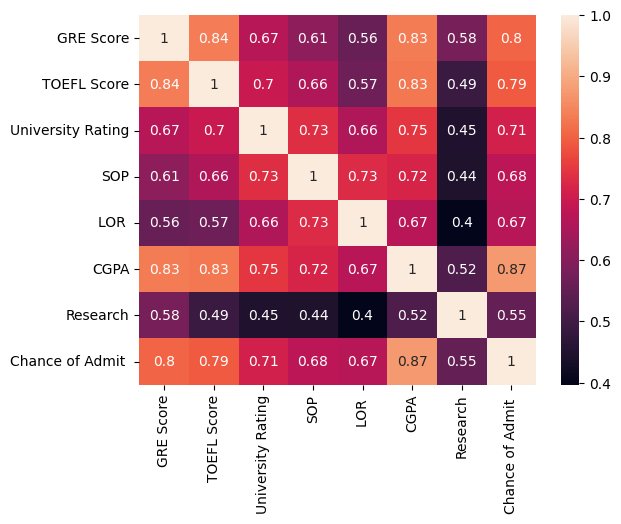

In [ ]:
sns.heatmap(corr,annot=True)

[Text(0, 0, '181'), Text(0, 0, '219')]

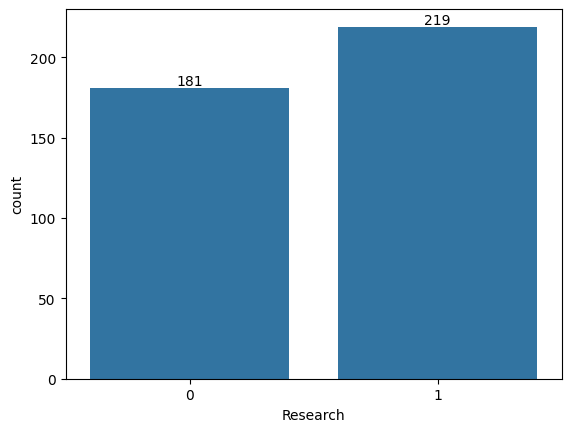

In [ ]:
ax = sns.countplot(x="Research",data=admissions)
ax.bar_label(ax.containers[0])

In [ ]:
admissions.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<Axes: xlabel='Research', ylabel='Chance of Admit '>

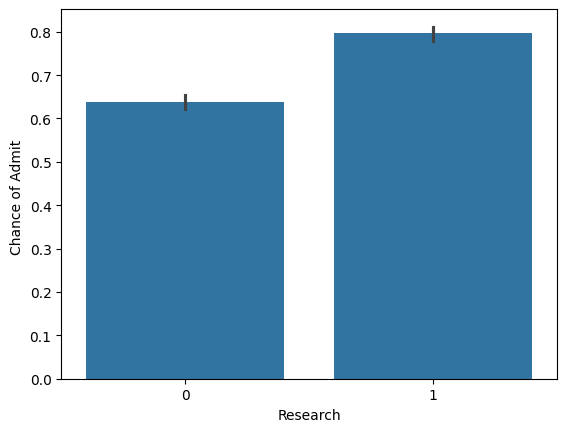

In [ ]:
sns.barplot(x="Research",y="Chance of Admit ",data=admissions)

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

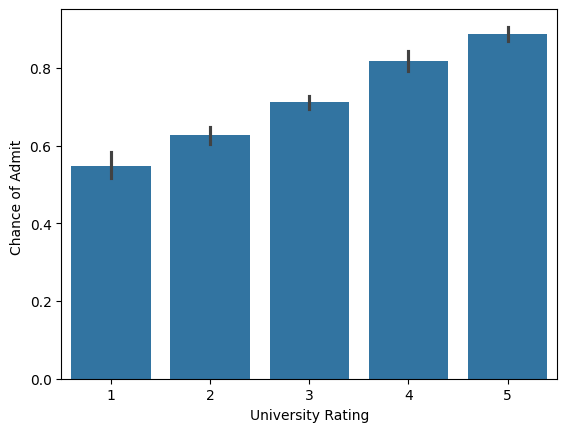

In [ ]:
sns.barplot(x="University Rating",y="Chance of Admit ",data=admissions)

<Axes: xlabel='SOP', ylabel='Chance of Admit '>

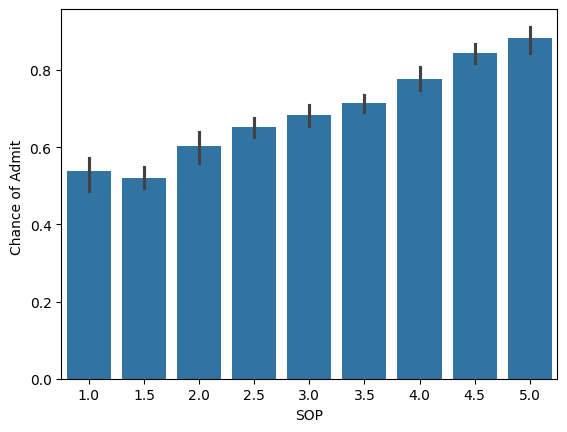

In [ ]:
sns.barplot(x="SOP",y="Chance of Admit ",data=admissions)

<Axes: xlabel='LOR ', ylabel='Chance of Admit '>

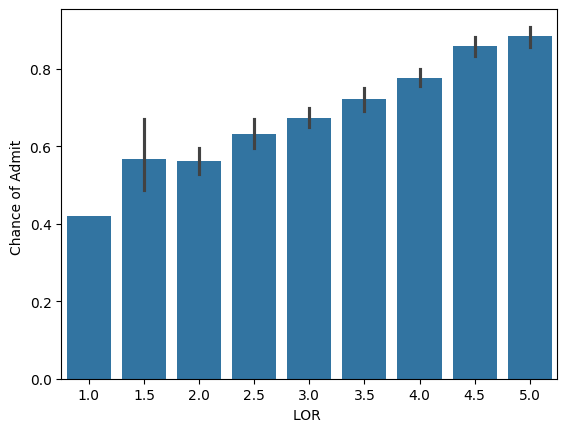

In [ ]:
sns.barplot(x="LOR ",y="Chance of Admit ",data=admissions)

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

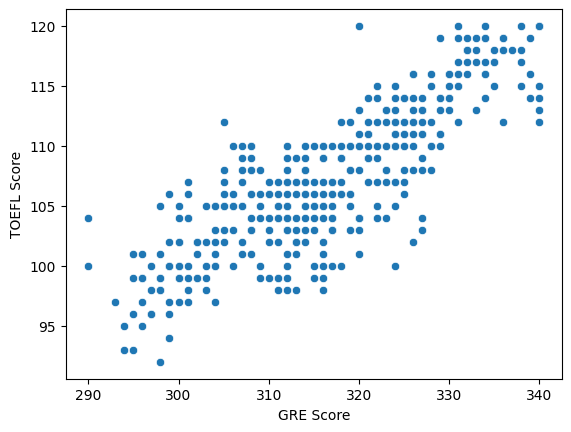

In [ ]:
sns.scatterplot(x="GRE Score",y="TOEFL Score",data = admissions)

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

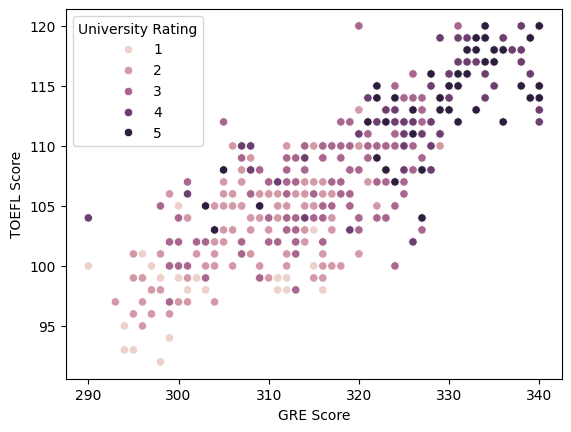

In [ ]:
sns.scatterplot(x="GRE Score",y="TOEFL Score",hue="University Rating", data = admissions)

<Axes: xlabel='TOEFL Score', ylabel='Count'>

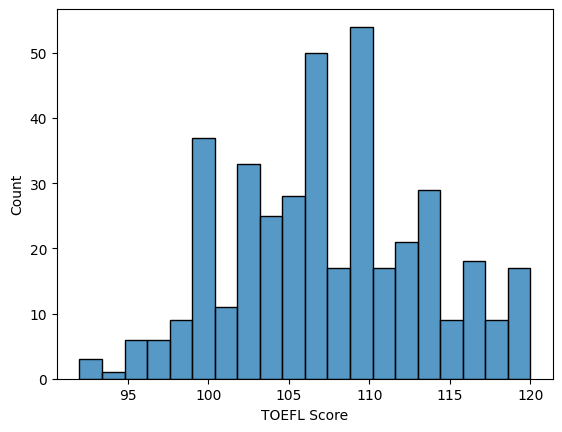

In [ ]:
sns.histplot(admissions['TOEFL Score'],bins=20)

<Axes: xlabel='GRE Score', ylabel='Count'>

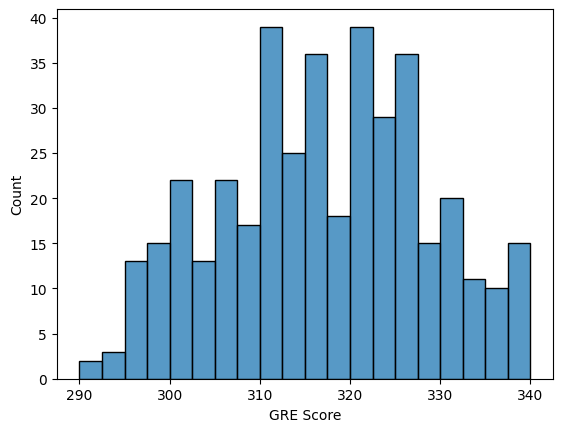

In [ ]:
sns.histplot(admissions['GRE Score'],bins=20)

In [ ]:
y = admissions["Chance of Admit "]
X = admissions.drop(["Chance of Admit "],axis=1)

In [ ]:
X.shape

(400, 7)

In [ ]:
y.shape

(400,)

In [ ]:
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(400, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape , X_test.shape ,y_train.shape, y_test.shape)

(320, 7) (80, 7) (320, 1) (80, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_predictions = ln_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
print("Mean Squared Error of the model is ",mean_squared_error(y_predictions,y_test))
print("Mean absolute Error of the model is ",mean_absolute_error(y_predictions,y_test))
print("R2 score of the model is ",r2_score(y_predictions,y_test))

Mean Squared Error of the model is  0.22758907347900395
Mean absolute Error of the model is  0.3367016177179793
R2 score of the model is  0.727000083331922


Simple linear regression

In [ ]:
X1 = admissions[['CGPA']]
y1 = admissions['Chance of Admit ']

ln_model2 = LinearRegression().fit(X1,y1)

In [ ]:
coefficient = ln_model2.coef_[0]
intercept = ln_model2.intercept_

print("Coefficient: ",coefficient)
print("intercept : ",intercept)

Coefficient:  0.2088472295006913
intercept :  -1.0715116629342316


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
dt_model_prediction = dt_model.predict(X_test)

In [ ]:
print("Mean Squared Error of the model is ",mean_squared_error(dt_model_prediction,y_test))
print("Mean absolute Error of the model is ",mean_absolute_error(dt_model_prediction,y_test))
print("R2 score of the model is ",r2_score(dt_model_prediction,y_test))

Mean Squared Error of the model is  0.44333500808601156
Mean absolute Error of the model is  0.44319719075236
R2 score of the model is  0.5796036179213313
